# Data Transformation
Data transformation is the process of converting data from one format or structure to another to make it suitable for analysis.

#### Standard scalar 
-3 - +3

#### Min Max Scalar
0 - 1

#### Max Absolute Scalar
-1 - +1

If the used algorithm can handle negatuce values then we will use either standard scalar or max absolute scalar. If the algorithm can't handle negative values, then we will use min max scalar.


#### Quantile Transformer:-
Quantile transformer maps data points to their corresponding quantiles within a specified distribution. It is used when we data parameteric distribution (not normally distributed data.)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Generate non-normal data (exponential distribution)
np.random.seed(0)
df = np.random.exponential(size=1000, scale=2)
df = pd.DataFrame(df, columns=['values'])
df

,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097
...,...
995,0.205564
996,1.446892
997,5.574577
998,0.519217


<Axes: xlabel='values', ylabel='Count'>

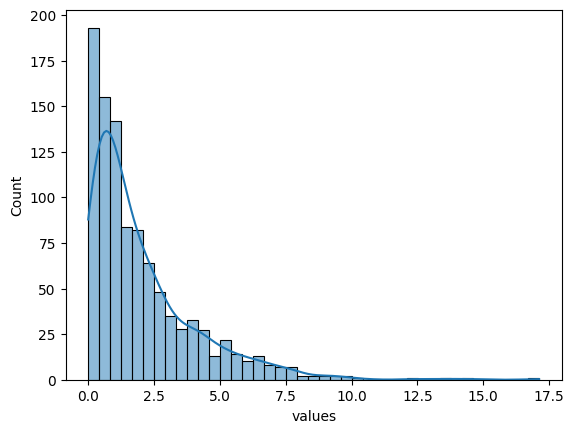

In [5]:
sns.histplot(df['values'], kde=True)

In [15]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

pt_boxcox = PowerTransformer(method='box-cox', standardize=False)
pt_yeo = PowerTransformer(method='yeo-johnson', standardize=False)
qt_normal = QuantileTransformer(output_distribution='normal')

# Note: Data must be positive for boxcox transformation
df['Box-cox'] = pt_boxcox.fit_transform(df[['values']] + 1)
df['Yeo-Johnson'] = pt_yeo.fit_transform(df[['values']])
df['Quantile'] = qt_normal.fit_transform(df[['values']])

In [16]:
df.head()

,values,Box-cox,Yeo-Johnson,Quantile
0,1.591749,0.787485,0.787485,0.162552
1,2.511862,0.980233,0.980233,0.587964
2,1.846446,0.849553,0.849553,0.286135
3,1.574402,0.782945,0.782945,0.157469
4,1.102097,0.639848,0.639848,-0.154930


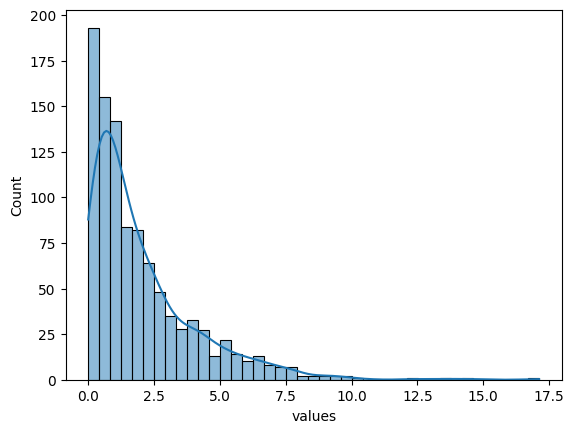

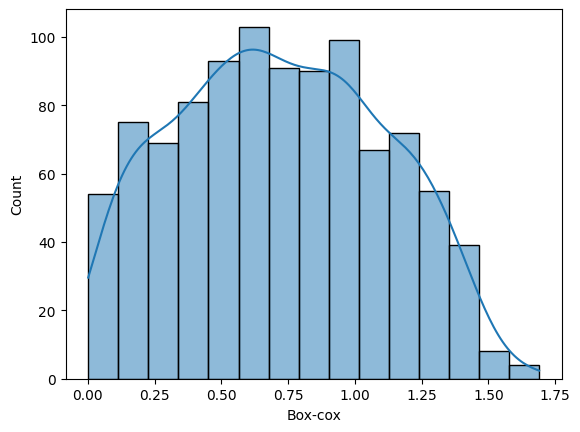

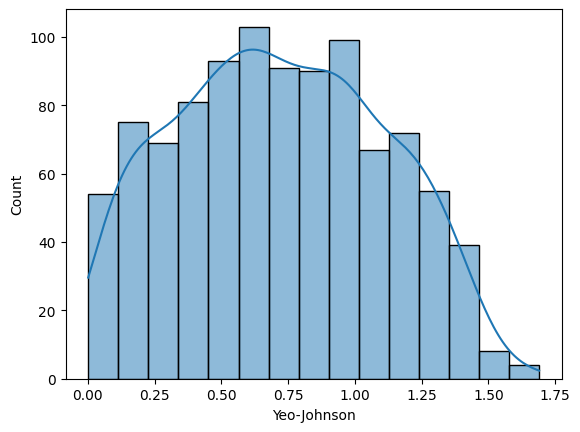

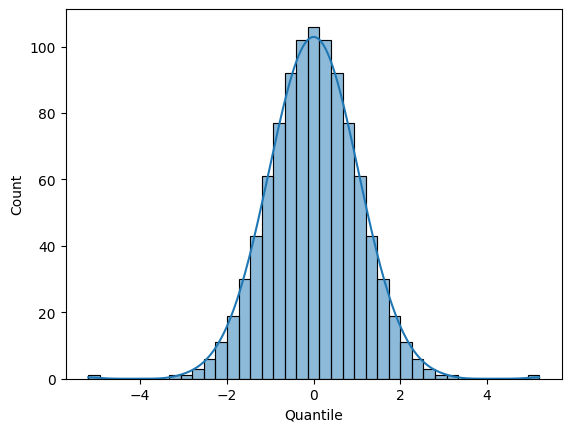

In [17]:
# Create histograms for all columns
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()

# L2 Normalization

L2 normalization is a technique used to scale data points to have a unit norm. This means that the Euclidean distance from the origin to the data point is always 1. It's often used in applications like natural language processing and computer vision to ensure that features are on a similar scale and prevent features with larger magnitudes from dominating the learning process.

In [19]:
from sklearn.preprocessing import Normalizer

data = [[1,1,1], [1,1,0],[1,0,0]]
normalizer = Normalizer(norm='l2')
print(normalizer.fit_transform(data))

[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [1.         0.         0.        ]]


# L1 Normalization
L1 normalization is another technique used to scale data points to have a unit norm, but it differs from L2 normalization in how it calculates the norm. Instead of using the Euclidean distance (L2 norm), L1 normalization uses the Manhattan distance (L1 norm).

In [20]:
from sklearn.preprocessing import Normalizer

data = [[1,1,1], [1,1,0],[1,0,0]]
normalizer = Normalizer(norm='l1')
print(normalizer.fit_transform(data))

[[0.33333333 0.33333333 0.33333333]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]]


1. Z-Score Normalization
    1. Standard Scalar
2. Min-Max Normalization
    1. Min-Max Scalar

# Log Transformation

In [21]:
import pandas as pd
import numpy as np

In [23]:
# Example dataset with skewed values
df = {"Values": [1,5, 10, 20, 50, 100, 200, 500, 1000, 1500, 5000, 10000, 50000, 100000]}
df = pd.DataFrame(df)
df

,Values
0,1
1,5
2,10
3,20
4,50
5,100
6,200
7,500
8,1000
9,1500


<Axes: xlabel='Values', ylabel='Count'>

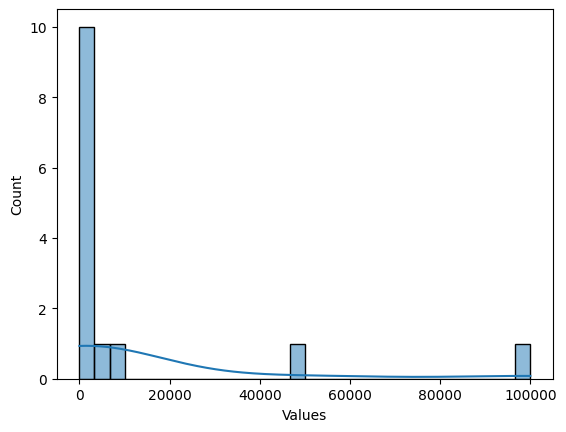

In [24]:
sns.histplot(df['Values'], kde=True)

In [26]:
df['log_values'] = np.log(df['Values'])
df

,Values,log_values
0,1,0.000000
1,5,1.609438
2,10,2.302585
3,20,2.995732
4,50,3.912023
5,100,4.605170
6,200,5.298317
7,500,6.214608
8,1000,6.907755
9,1500,7.313220


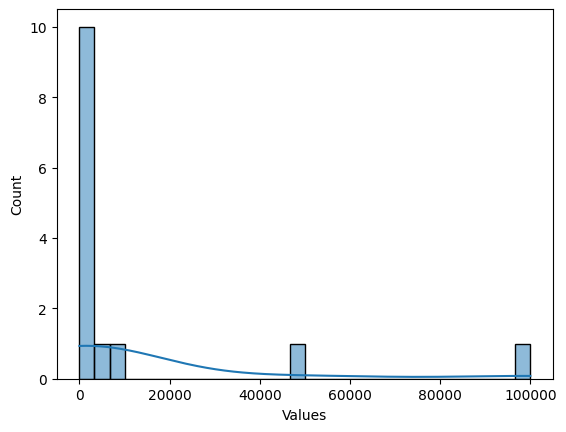

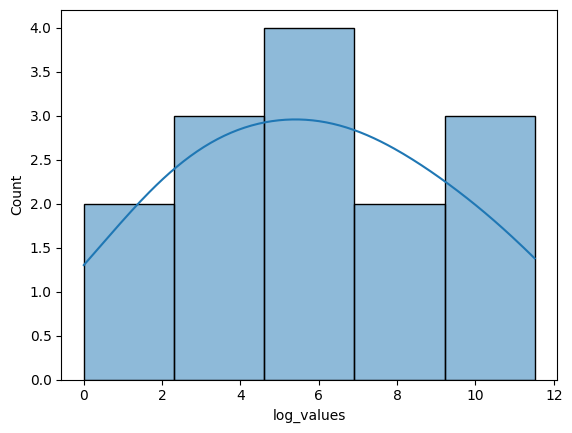

In [27]:
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()

# Scaling vs Normalization

##### Similarities:
1. Both are used in Machine Learning during preprocessing.
2. Both are used in data analytics also.
3. Both are interchangable.

##### Differences:
1.  Goal:
    The goal of scaling is to ensure that features have a similar scale, preventing features with larger magnitudes from dominating the learning process.

1.  Goal:
    The goal of normalization is to ensure that data have unit a norm, meaning their Euclidean distance from the origin is 1.

2.  Methods for Scaling:
    - Standard Scaling: Subtracts the mean and divides by the standard deviation. 
    - MinMax Scaling: Rescales data to a specific range (e.g 0 to 1).
    - Robust Scaling: Uses the median and IQR to making scaling more robust to others.

2. Methods for Normalization:
    - L1 Normalization: Divides each element by the sum of absolute values of all elements.
    - L2 Normalization: Divides each element by the root of the sum of squares of all elements.

3. Key Differences :
    - Purpose:
        Scaling is primarily used to ensure features on a similar scale, while normalization is used to ensure data points have a unit norm.

    - Impact on distribution:
        Scaling prevents the shape of distribution, while normalization can change the shape of distribution.

    - Applications:
        scaling is more commonly used in Machine Learning algorithms, while Normalization is often used in applications like Natural Language Processing & Computer Vision.
